In [1]:
import numpy as np
import os
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle           
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf 
from tqdm import tqdm
import gradio as gr
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

C:\Users\saipr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from pathlib import Path
from PIL import Image
loaded_data = Path("C:\\Users\\saipr\\OneDrive\\Desktop\\DL\\archive")
total_image_count = 0
vehicle_categories = list(loaded_data.glob('*'))
if len(vehicle_categories) > 0:
    for vehicle_category in vehicle_categories:
        vehicle_images = list(vehicle_category.glob('*.jpeg')) + list(vehicle_category.glob('*.png')) + list(vehicle_category.glob('*.jpg'))
        if len(vehicle_images) > 0:
            total_image_count += len(vehicle_images)
    print(f"Total number of vehicle images found: {total_image_count}")
else:
    print("No vehicle categories (subfolders) found in the directory.")



Total number of vehicle images found: 460


In [3]:
set_height, set_width = 150, 150
batch_size = 32

In [4]:
#training
train_images = tf.keras.preprocessing.image_dataset_from_directory(
    loaded_data,
    subset="training",
    validation_split = 0.75,
    seed=123,
    image_size=(set_height, set_width),
    batch_size=batch_size
)
val_images = tf.keras.preprocessing.image_dataset_from_directory(
    loaded_data,
    subset="validation",  
    validation_split=0.25,  
    seed=123,
    image_size=(set_height, set_width),
    batch_size=batch_size
)
vehicle_classes = train_images.class_names
print(vehicle_classes)
dataset_classes = 3

Found 460 files belonging to 3 classes.
Using 115 files for training.
Found 460 files belonging to 3 classes.
Using 115 files for validation.
['Bus', 'car', 'motorbike']


In [5]:
import matplotlib.pyplot as plt

def create_cnn_model(dropout_rate):
    model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255,input_shape=(set_height, set_width, 3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),  
        layers.Dense(dataset_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

In [6]:
#Define a list of dropout rates to try
dropout_rates = [0.0, 0.2, 0.4]

# Store training history for each model
training_histories = []

# Train models with different dropout rates
for dropout_rate in dropout_rates:
    print(f"Training model with dropout rate: {dropout_rate}")
    model = create_cnn_model(dropout_rate)
    history = model.fit(
        train_images,
        validation_data=val_images,
        epochs=20
    )
    training_histories.append((dropout_rate,history))

Training model with dropout rate: 0.0
Epoch 1/20


C:\Users\saipr\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 3s 376ms/step - loss: 1.7904 - accuracy: 0.3304 - val_loss: 1.0762 - val_accuracy: 0.3652
Epoch 2/20
4/4 [==============================] - 1s 306ms/step - loss: 1.0802 - accuracy: 0.3913 - val_loss: 1.0800 - val_accuracy: 0.4087
Epoch 3/20
4/4 [==============================] - 1s 335ms/step - loss: 1.0484 - accuracy: 0.6870 - val_loss: 1.0644 - val_accuracy: 0.3913
Epoch 4/20
4/4 [==============================] - 1s 307ms/step - loss: 1.0020 - accuracy: 0.4435 - val_loss: 1.0278 - val_accuracy: 0.4522
Epoch 5/20
4/4 [==============================] - 1s 329ms/step - loss: 0.9102 - accuracy: 0.6609 - val_loss: 0.9650 - val_accuracy: 0.5130
Epoch 6/20
4/4 [==============================] - 1s 330ms/step - loss: 0.8037 - accuracy: 0.6870 - val_loss: 0.8974 - val_accuracy: 0.6522
Epoch 7/20
4/4 [==============================] - 1s 308ms/step - loss: 0.6351 - accuracy: 0.8609 - val_loss: 0.8302 - val_accuracy: 0.6261
Epoch 8/20
4/4 [===============

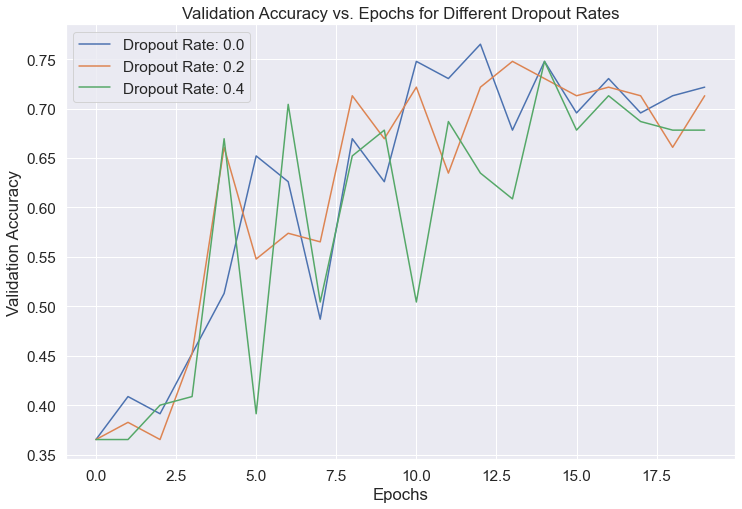

In [7]:
plt.figure(figsize=(12, 8))
for dropout_rate, history in training_histories:
    plt.plot(history.history['val_accuracy'], label=f'Dropout Rate: {dropout_rate}')
plt.title('Validation Accuracy vs. Epochs for Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#building model
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(set_height, set_width, 3))
model = Sequential([
    Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3),padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3),padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3),padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Three classes
])
#compiling
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(
  train_images,
  validation_data=val_images,
  epochs=20
)

Epoch 1/20
4/4 [==============================] - 5s 811ms/step - loss: 370.8011 - accuracy: 0.4174 - val_loss: 10.2868 - val_accuracy: 0.2522
Epoch 2/20
4/4 [==============================] - 3s 790ms/step - loss: 9.5007 - accuracy: 0.3130 - val_loss: 1.8835 - val_accuracy: 0.3652
Epoch 3/20
4/4 [==============================] - 3s 773ms/step - loss: 1.3864 - accuracy: 0.3391 - val_loss: 1.0394 - val_accuracy: 0.5130
Epoch 4/20
4/4 [==============================] - 3s 787ms/step - loss: 1.0324 - accuracy: 0.5043 - val_loss: 1.0027 - val_accuracy: 0.4435
Epoch 5/20
4/4 [==============================] - 9s 3s/step - loss: 0.9101 - accuracy: 0.5652 - val_loss: 0.9333 - val_accuracy: 0.5826
Epoch 6/20
4/4 [==============================] - 29s 1s/step - loss: 0.7705 - accuracy: 0.6174 - val_loss: 0.9416 - val_accuracy: 0.5043
Epoch 7/20
4/4 [==============================] - 3s 738ms/step - loss: 0.7467 - accuracy: 0.6957 - val_loss: 0.8875 - val_accuracy: 0.5739
Epoch 8/20
4/4 [======

In [10]:
model.save('model.h5')

C:\Users\saipr\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
predictions = model.predict(val_images)

4/4 [==============================] - 1s 133ms/step


In [12]:
def predict_input_image(img):
  img_4d=img.reshape(-1,150,150,3)
  prediction=model.predict(img_4d)[0]
  return {vehicle_classes[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(150,150))

label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True',share=True)

C:\Users\saipr\AppData\Local\Temp/ipykernel_23776/3396698984.py:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(150,150))
C:\Users\saipr\AppData\Local\Temp/ipykernel_23776/3396698984.py:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(150,150))
C:\Users\saipr\AppData\Local\Temp/ipykernel_23776/3396698984.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=3)
C:\Users\saipr\AppData\Local\Temp/ipykernel_23776/3396698984.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=3)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://971a47adacaf2e06c1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
